### Connecting to APIs

Importing necessary packages

In [102]:
import requests
import pandas as pd
import datetime as dt
import seaborn as sns
from configparser import ConfigParser

Reading API Key from configuration file, and setting connection parameters

In [103]:
config = ConfigParser()
config.read('config.ini')
token = config.get('tokens','api_key')
base_url = 'https://www.alphavantage.co/query?'
params = {
    "function": "TIME_SERIES_DAILY",
    "symbol": "AAPL",
    "apikey": f"{token}"}

In [104]:
#Making request to API endpoint
response = requests.get(base_url, params=params)
#Make sure we got a succesfull response
print(response)

<Response [200]>


In [105]:
#Converting response to json format
data = response.json()

Adding function that will parse and format the json response, and then convert it to pandas DataFrame

In [106]:
def df_from_response(data,
         columns=['date','Open', 'High', 'Low', 'Close', 'Volume']):

    def convert_response(d):
        # convert the response into a format that can be parsed by Pandas
        for dt, prec in d['Time Series (Daily)'].items():
            r = { 'datetime': dt}
            r.update(prec)
            yield r

    # pass your response 'page'
    df = pd.DataFrame(convert_response(data))
    # rename the columns    
    df = df.rename(columns={'1. open': 'Open',
                            '2. high': 'High',
                            '3. low': 'Low',
                            '4. close': 'Close',
                            '5. volume': 'Volume'})
    df['date'] = pd.to_datetime(df['datetime'])
    df.sort_index(inplace=True)
    # extract the default columns
    df = df[columns]
    return df

Applying function to the json data

In [107]:
df = df_from_response(data)
df

,date,Open,High,Low,Close,Volume
0,2022-05-11,153.5000,155.4500,145.8100,146.5000,142689825
1,2022-05-10,155.5200,156.7400,152.9300,154.5100,115366736
2,2022-05-09,154.9250,155.8300,151.4900,152.0600,131577921
3,2022-05-06,156.0100,159.4400,154.1800,157.2800,116124647
4,2022-05-05,163.8500,164.0800,154.9500,156.7700,130525275
...,...,...,...,...,...,...
95,2021-12-23,175.8500,176.8499,175.2700,176.2800,68356567
96,2021-12-22,173.0400,175.8600,172.1500,175.6400,92135303
97,2021-12-21,171.5550,173.2000,169.1200,172.9900,91185905
98,2021-12-20,168.2800,170.5800,167.4600,169.7500,107499114


In [108]:
#Checking Rows and Data Types in the DataFrame before adding new columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    100 non-null    datetime64[ns]
 1   Open    100 non-null    object        
 2   High    100 non-null    object        
 3   Low     100 non-null    object        
 4   Close   100 non-null    object        
 5   Volume  100 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 4.8+ KB


In [109]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [110]:
df.describe()

,date,Open,High,Low,Close,Volume
count,100,100,100,100,100,100
unique,100,100,99,100,95,100
top,2022-03-24 00:00:00,163.8500,174.1400,163.9100,176.2800,90865899
freq,1,1,2,1,2,1
first,2021-12-17 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2022-05-11 00:00:00,NaN,NaN,NaN,NaN,NaN


Getting a DataFrame with prices for the current month

In [111]:
#Creating new columns for Year and Month
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
#Converting Object columns to Float type
df.Open = df.Open.astype(float)
df.High = df.High.astype(float)
df.Low = df.Low.astype(float)
df.Close = df.Close.astype(float)
df.Volume = df.Volume.astype(float)
#Rearranging the columns in the DataFrame
df = df[['year','month','day','Open','High','Low','Close','Volume']]

In [112]:
#Checking new Rows and Data Types in the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    100 non-null    int64  
 1   month   100 non-null    int64  
 2   day     100 non-null    int64  
 3   Open    100 non-null    float64
 4   High    100 non-null    float64
 5   Low     100 non-null    float64
 6   Close   100 non-null    float64
 7   Volume  100 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 6.4 KB


Filtering rows of that DataFrame corresponding to a specific month

In [113]:
df1 = df.loc[(df['year'] == 2022) & (df['month'] == 4)]
df1

,year,month,day,Open,High,Low,Close,Volume
8,2022,4,29,161.84,166.2000,157.250,157.65,131747571.0
9,2022,4,28,159.25,164.5150,158.930,163.64,130216792.0
10,2022,4,27,155.91,159.7900,155.380,156.57,88063191.0
11,2022,4,26,162.25,162.3400,156.720,156.80,94008394.0
12,2022,4,25,161.12,163.1700,158.460,162.88,96046376.0
13,2022,4,22,166.46,167.8699,161.500,161.79,84882424.0
14,2022,4,21,168.91,171.5300,165.910,166.42,87227768.0
15,2022,4,20,168.76,168.8800,166.100,167.23,67718110.0
16,2022,4,19,165.02,167.8200,163.910,167.40,67723833.0
17,2022,4,18,163.92,166.5984,163.570,165.07,69023941.0


<AxesSubplot:xlabel='day', ylabel='Close'>

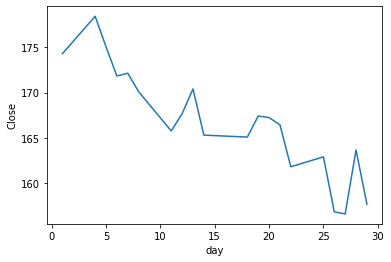

In [114]:
sns.lineplot(data = df1, 
             x = "day", 
             y = "Close")